Import knihoven


In [149]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [150]:
#loads coco.names into list classNames 
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [151]:
model = YOLO('yolov8n.pt')#loads the model 

Pokud chci hledat urcity objekt zjisti jeho id

In [152]:
searched_object = 'pottedplant' #name of object I want to find
object_id = classNames.index(searched_object)# gets id of the object I want to find  
print(object_id)

58


nacte a zobrazy zvoleny obrazek

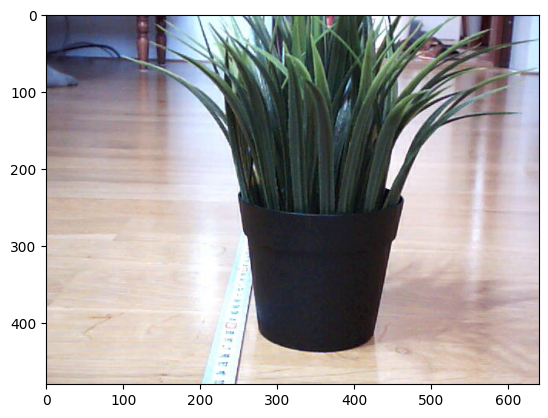

In [153]:
img = cv2.imread('40.jpg')#loads the picture into variable 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show the picture in rgb because cv2 use BGR color model  

zjisti velikost obrazku 

In [154]:
img_height,img_width,img_channels = img.shape# gets some info 
print('width',img_width,'Px')#width
print('height',img_height,'Px')#height 
print('channels',img_channels)#colour channels 

width 640 Px
height 480 Px
channels 3


pouziti modelu na nalezeni objektu

In [155]:
results = model(img)#applies model on the image 



0: 480x640 1 potted plant, 1 vase, 85.9ms
Speed: 1.0ms preprocess, 85.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


vykresleni jednotlivych objektu na obrazek

In [156]:
objects_ids = []#list for ids of found objects 
objects_centers = []#list for objects centers 
objects_heights = []# list for objects height, used for calculating distance of the objects 
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#gets the object id 
            print(classNames[cls])#prints the object class 
            print(cls) #prints the object id 
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu 
            cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,255),thickness=2 )#vykresli na video primku stredem videa 

pottedplant
58
X= 121 Y= 0 W= 630 H= 462
center: 375 231
confidence: 33
vase
75
X= 248 Y= 233 W= 466 H= 442
center: 357 337
confidence: 31


array([[[ 75,  65,  58],
        [ 75,  65,  58],
        [ 76,  64,  60],
        ...,
        [255, 232, 202],
        [255, 230, 200],
        [255, 229, 199]],

       [[ 73,  61,  57],
        [ 73,  61,  57],
        [ 74,  62,  58],
        ...,
        [255, 232, 202],
        [255, 230, 200],
        [255, 229, 199]],

       [[ 71,  56,  54],
        [ 72,  57,  55],
        [ 73,  58,  56],
        ...,
        [255, 232, 202],
        [255, 230, 200],
        [255, 229, 199]],

       ...,

       [[170, 189, 202],
        [170, 189, 202],
        [171, 188, 201],
        ...,
        [181, 192, 212],
        [180, 191, 211],
        [180, 191, 211]],

       [[170, 189, 204],
        [170, 189, 204],
        [171, 187, 203],
        ...,
        [177, 191, 210],
        [176, 190, 209],
        [175, 189, 208]],

       [[171, 190, 205],
        [170, 189, 204],
        [172, 188, 204],
        ...,
        [176, 190, 209],
        [173, 188, 207],
        [173, 188, 207]]

vypise id nalezenych objektu 

In [157]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[58, 75]
[(375, 231), (357, 337)]
[462, 442]


hledani urciteho objektu

In [158]:
a = objects_ids.index(58)#v listu object_ids hleda urcite cislo a vypise jeho index
print(a)
x,y=objects_centers[a]# v listu object centers hleda pro dany index hodnoty
print(x,y)
center_line = int(img_width/2)# x souradnice primky zobrazujici stred
object_deviation = center_line-x #odchylka objektu od stredu obrazovky
print('deviation = ',object_deviation) 
h = objects_heights[a]
print(h)
distance = 172.956-0.322004*h
print(distance)



0
375 231
deviation =  -55
462
24.190151999999983


ukaze obrazek

tensor([[1.2182e+02, 1.4893e-02, 6.3071e+02, 4.6253e+02, 3.3206e-01, 5.8000e+01],
        [2.4830e+02, 2.3387e+02, 4.6638e+02, 4.4254e+02, 3.1489e-01, 7.5000e+01]])


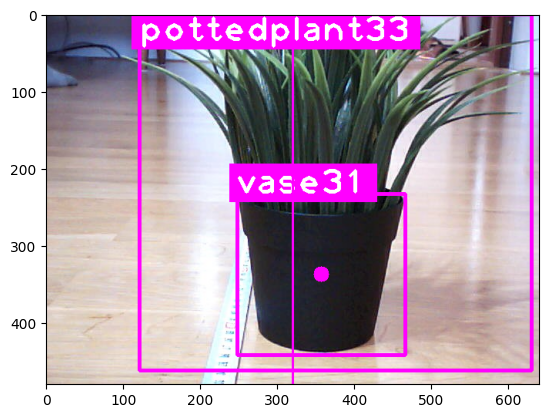

In [159]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
